<a href="https://colab.research.google.com/github/nnish16/TCR_Internship/blob/main/TCR_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TCR Innovation Internship

# **Assignment - HR Attrition data**

In this assignment , we need to predict whether a give employee will leave the
organization or not.<br>The target column is Attrition
We will create a model with the following steps:<br>



1.   Import the relevant packages
2.   Download and explore the dataset
3.   Perform EDA, Apply dataset for preprocessing
4.   Predict the target columns



Importing required **Packages**

In [25]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import category_encoders as ce
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
%matplotlib inline


Loading assignment Dataset

In [17]:
data = pd.read_csv("/content/drive/MyDrive/DATA SCIENCE WITH ML AND PY/ML content/assignment/HR_Employee_Attrition-1.csv")
data.head()

,EmployeeNumber,Attrition,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,Yes,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,...,1,80,0,8,0,1,6,4,0,5
1,2,No,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,...,4,80,1,10,3,3,10,7,1,7
2,3,Yes,37,Travel_Rarely,1373,Research & Development,2,2,Other,1,...,2,80,0,7,3,3,0,0,0,0
3,4,No,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,...,3,80,0,8,3,3,8,7,3,0
4,5,No,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,...,4,80,1,6,3,3,2,2,2,2


**About the Dataset**<br>
This dataset is regaurding the employees who want to either leave their jobs or continue with to work. The same thing is described in the column named as **Attrition** in the form of "**yes**" or "**no**".<br> This dataset consists of categorical & numerical data. Attrition is the target column in the dataset while rest other can be features to train the Machine Learning model. We need to analyze the given dataset & build an appropriate Machine Learning model with **Higher Accurac**y

Initial EDA

In [18]:
data.shape

(2940, 35)

In [19]:
data.columns

Index(['EmployeeNumber', 'Attrition', 'Age', 'BusinessTravel', 'DailyRate',
       'Department', 'DistanceFromHome', 'Education', 'EducationField',
       'EmployeeCount', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [20]:
data.isnull().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of       EmployeeNumber  Attrition    Age  BusinessTravel  DailyRate  Department  \
0              False      False  False           False      False       False   
1              False      False  False           False      False       False   
2              False      False  False           False      False       False   
3              False      False  False           False      False       False   
4              False      False  False           False      False       False   
...              ...        ...    ...             ...        ...         ...   
2935           False      False  False           False      False       False   
2936           False      False  False           False      False       False   
2937           False      False  False           False      False       False   
2938           False      False  False           False      False       False   
2939           False      False  False         

In [21]:
data.nunique() 

EmployeeNumber              2940
Attrition                      2
Age                           43
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

In [22]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
EmployeeNumber,2940.0,1470.500000,848.849221,1.0,735.75,1470.5,2205.25,2940.0
Age,2940.0,36.923810,9.133819,18.0,30.00,36.0,43.00,60.0
DailyRate,2940.0,802.485714,403.440447,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,2940.0,9.192517,8.105485,1.0,2.00,7.0,14.00,29.0
Education,2940.0,2.912925,1.023991,1.0,2.00,3.0,4.00,5.0
EmployeeCount,2940.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EnvironmentSatisfaction,2940.0,2.721769,1.092896,1.0,2.00,3.0,4.00,4.0
HourlyRate,2940.0,65.891156,20.325969,30.0,48.00,66.0,84.00,100.0
JobInvolvement,2940.0,2.729932,0.711440,1.0,2.00,3.0,3.00,4.0
JobLevel,2940.0,2.063946,1.106752,1.0,1.00,2.0,3.00,5.0


**Graph Plot**

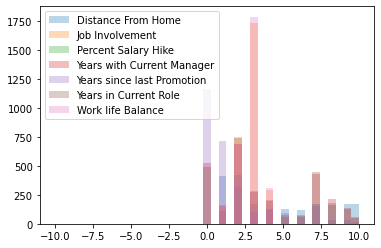

In [29]:
bins = np.linspace(-10,10,40)
plt.hist(data.DistanceFromHome, bins, alpha=0.3, label="Distance From Home")
plt.hist(data.JobInvolvement, bins, alpha=0.3, label="Job Involvement" )
plt.hist(data.PercentSalaryHike, bins, alpha=0.3, label="Percent Salary Hike")
plt.hist(data.YearsWithCurrManager, bins, alpha=0.3, label="Years with Current Manager")
plt.hist(data.YearsSinceLastPromotion, bins, alpha=0.3, label="Years since last Promotion")
plt.hist(data.YearsInCurrentRole, bins, alpha=0.3, label="Years in Current Role")
plt.hist(data.WorkLifeBalance,  bins, alpha=0.3, label="Work life Balance")
plt.legend(loc="upper left")
plt.show()

### Looking for Duplicate Data

In [30]:
duplicate_data = data[data.duplicated()]
duplicate_data

,EmployeeNumber,Attrition,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager


### Selecting Categorical & Creating a Seperate List 

In [31]:
categorical = [i for i in data.columns if data[i].dtype =="O"]
print(categorical) 

['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime']


In [32]:
data[categorical].head()

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,Yes,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Y,Yes
1,No,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,Y,No
2,Yes,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Y,Yes
3,No,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Y,Yes
4,No,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No


### PIE Chart

Text(0.5, 1.0, 'Attrition Probablity')

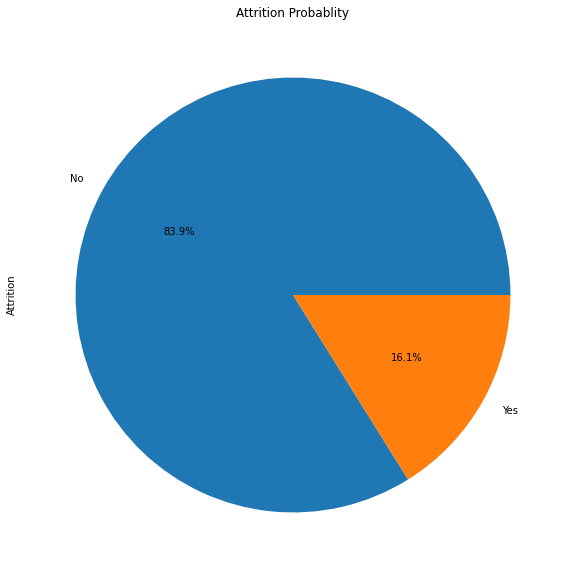

In [38]:
f, ax= plt.subplots(figsize=(10,10))
ax = data['Attrition' ].value_counts(). plot.pie(explode=[0,0], autopct = "%1.1F%%", shadow=False)
ax.set_title("Attrition Probablity")

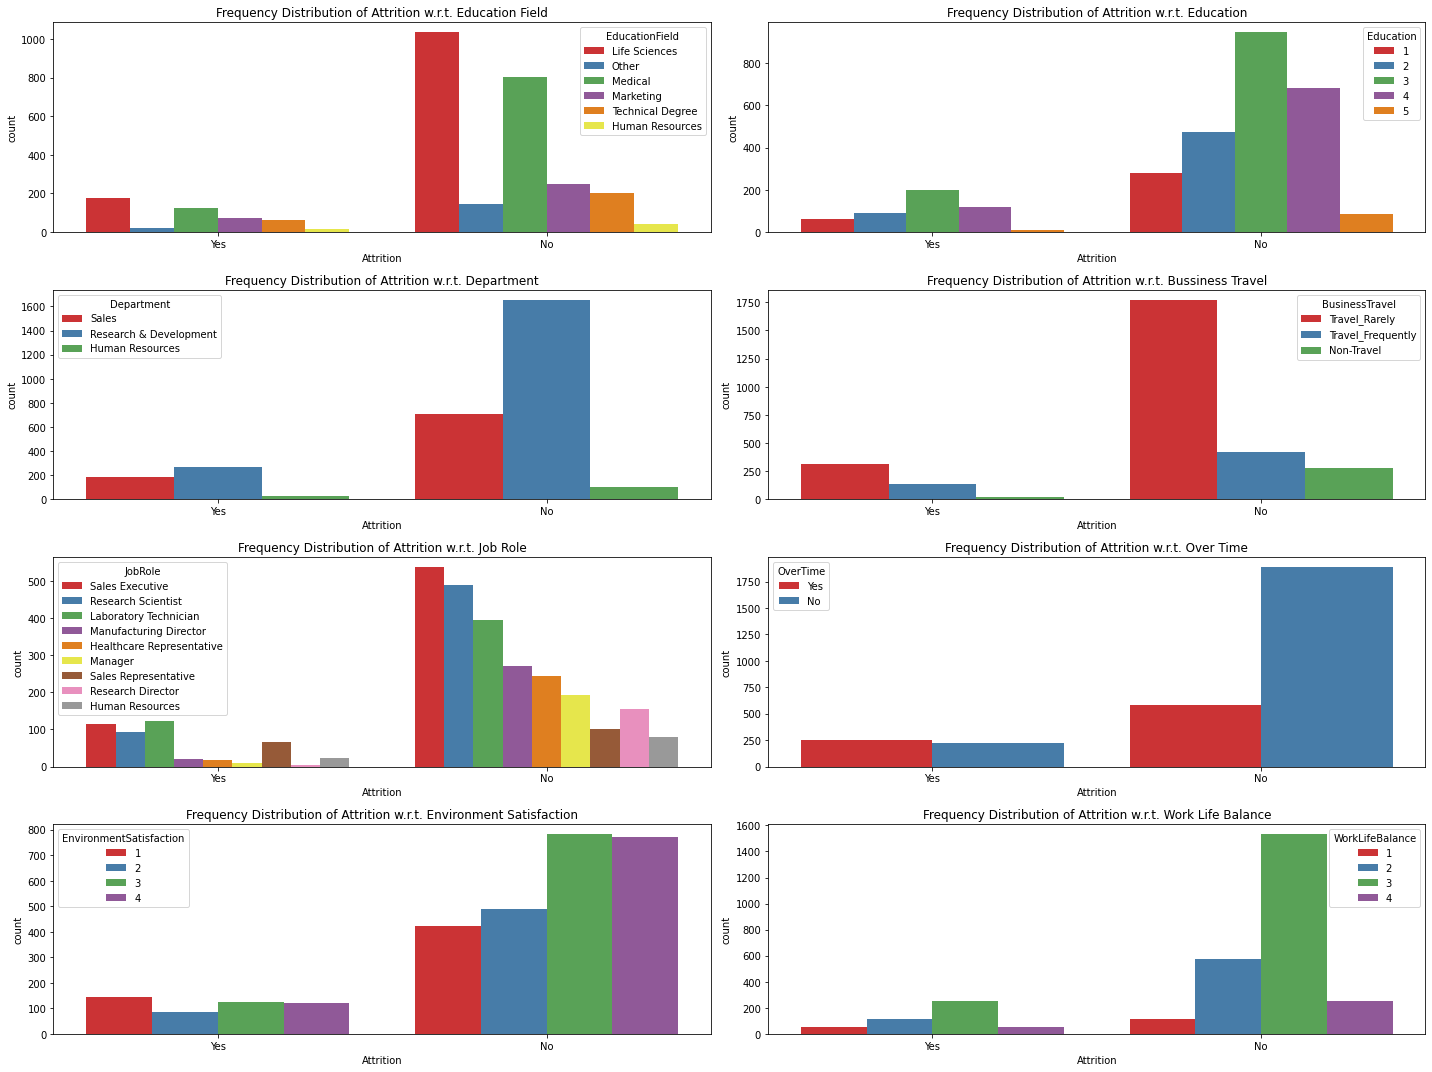

In [39]:
f, ax = plt.subplots(4,2, figsize=(20,15))

ax[0,0] = sns.countplot(x='Attrition', hue= 'EducationField', data=data, ax = ax[0,0], palette='Set1' )
ax[0,0].set_title("Frequency Distribution of Attrition w.r.t. Education Field")

ax[1,0] = sns.countplot(x='Attrition', hue= 'Department', data=data,  ax = ax[1,0], palette='Set1' )
ax[1,0].set_title("Frequency Distribution of Attrition w.r.t. Department")

ax[0,1] = sns.countplot(x='Attrition', hue= 'Education', data=data,  ax = ax[0,1], palette='Set1' )
ax[0,1].set_title("Frequency Distribution of Attrition w.r.t. Education")

ax[1,1] = sns.countplot(x='Attrition', hue= 'BusinessTravel', data=data,  ax = ax[1,1], palette='Set1' )
ax[1,1].set_title("Frequency Distribution of Attrition w.r.t. Bussiness Travel")

ax[2,0] = sns.countplot(x='Attrition', hue= 'JobRole', data=data, ax = ax[2,0], palette='Set1' )
ax[2,0].set_title("Frequency Distribution of Attrition w.r.t. Job Role")

ax[2,1] = sns.countplot(x='Attrition', hue= 'OverTime', data=data,  ax = ax[2,1],palette='Set1' )
ax[2,1].set_title("Frequency Distribution of Attrition w.r.t. Over Time")

ax[3,0] = sns.countplot(x='Attrition', hue= 'EnvironmentSatisfaction', data=data,  ax = ax[3,0],palette='Set1' )
ax[3,0].set_title("Frequency Distribution of Attrition w.r.t. Environment Satisfaction")

ax[3,1] = sns.countplot(x='Attrition', hue='WorkLifeBalance', data=data, ax = ax[3,1], palette='Set1')
ax[3,1].set_title("Frequency Distribution of Attrition w.r.t. Work Life Balance")

f.tight_layout()

### Feature selection

In [40]:
column_list = ['EmployeeNumber','Attrition','EmployeeCount','Over18','StandardHours']
x = data.drop(column_list, axis = 1)
y = data['Attrition']

print(x.columns)

Index(['Age', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EnvironmentSatisfaction', 'Gender',
       'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole',
       'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate',
       'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')


In [41]:
print(y)

0       Yes
1        No
2       Yes
3        No
4        No
       ... 
2935     No
2936     No
2937     No
2938     No
2939     No
Name: Attrition, Length: 2940, dtype: object


### Train-Test Split

In [42]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2,random_state=42 )

print(X_train.shape, X_test.shape)

(2352, 30) (588, 30)


### Using OrdinalEncoder method to convert categorical values into numerical values

In [44]:
encoder = ce.OrdinalEncoder(cols = ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime'])

X_train = encoder.fit_transform(X_train)
X_test = encoder.fit_transform(X_test)

### Data Preprocessing

In [45]:
cols = X_train.columns

scaler = RobustScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)
X_train = pd.DataFrame(X_train, columns= [cols])
X_test = pd.DataFrame(X_test, columns=[cols])

### Building and testing model by applyling Random Forest ML algorithm

In [ ]:
rfc = RandomForestClassifier(n_estimators=100, random_state=0)
rfc.fit(X_train, Y_train)
y_pred = rfc.predict(X_test)



In [48]:
score = accuracy_score(Y_test, y_pred)
print('randomforest classifier score: ', np.abs(score)*100)

randomforest classifier score:  95.23809523809523


In [47]:
y_pred

array(['No', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'Yes', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes',
       'Yes', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No',
       'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'No',
       'No', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'Yes', 'No',
       'Yes', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'Yes', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'Yes', 'Yes', 'No',

# Final Result




##  Algorithm Used --> Random Forest	
##   Accuracy Achieved --> 95%




Created By ~ Nishant Sarang






